In [23]:
%matplotlib inline
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
import math
from mpl_toolkits.basemap import Basemap
from itertools import chain
#sns.set_context("notebook", font_scale=1.5)
#plt.rcParams['figure.figsize'] = (17, 5)

In [24]:
#tracks = pd.read_csv("tracks.csv",low_memory = False)
#genres = pd.read_csv("genres.csv",low_memory = False)
#features = pd.read_csv("features.csv",low_memory = False)
#echonest = pd.read_csv("echonest.csv",low_memory = False)
#tracks.shape, genres.shape, features.shape, echonest.shape

In [25]:
artist = pd.read_csv("raw_artists.csv",low_memory = False)

In [26]:
date_created = artist[['artist_date_created']]

In [27]:
location = []
for index, row in artist.iterrows():
    if math.isnan(row['artist_latitude']):
        continue
    elif math.isnan(row['artist_longitude']):
        continue
    else:
        location.append((row['artist_longitude'],row['artist_latitude'])) 

/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


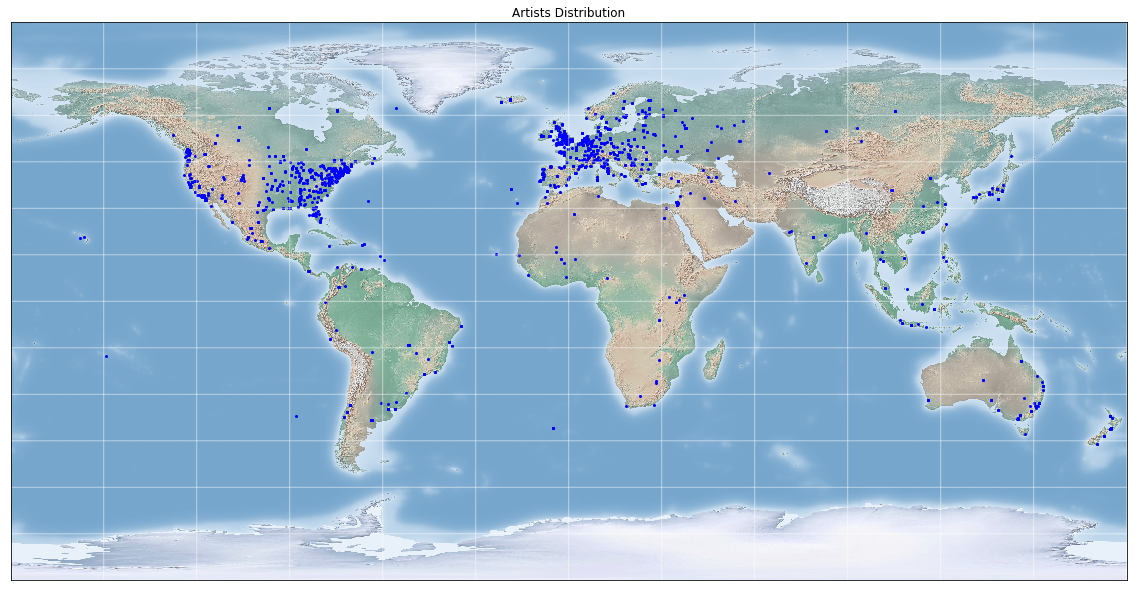

In [28]:
def draw_map(m, scale=0.5):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.5, color='w')
fig = plt.figure(figsize=(20,25), edgecolor='w')
plt.title("Artists Distribution")
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )

lons = []
lats = []
for i in location:
    lons.append(i[0])
    lats.append(i[1])
x,y = m(lons, lats)
m.plot(x, y, 'bo', markersize=2)
draw_map(m)

In [29]:
date_count = {}
for index, row in date_created.iterrows():
    time_list = row['artist_date_created'].split()
    if time_list[0] not in date_count:
        date_count[time_list[0]] = 1
    else:
        date_count[time_list[0]] += 1

In [30]:
number_count = {}
for i in date_count.values():
    if i not in number_count.keys():
        number_count[i] = 1
    else:
        number_count[i] +=1

In [31]:
days = number_count.keys()
counts = number_count.values()

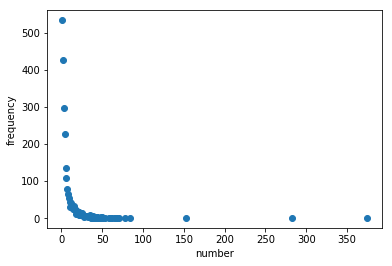

In [32]:
days = number_count.keys()
counts = number_count.values()
plt.xlabel('number')
plt.ylabel('frequency')
plt.scatter(days,counts)
plt.show()

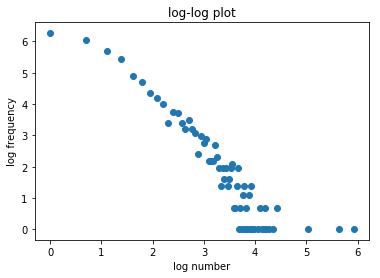

In [33]:
logdays = []
logcounts = []
for i in days:
    x = np.log(i)
    logdays.append(x)
for j in counts:
    y = np.log(j)
    logcounts.append(y)
plt.title('log-log plot')
plt.xlabel('log number')
plt.ylabel('log frequency')
plt.scatter(logdays,logcounts)
plt.show()

In [34]:
newdays = []
newcounts = []
for i in range(len(logdays)):
    if logdays[i] < 3:
        newdays.append(logdays[i])
        newcounts.append(logcounts[i])

In [35]:
from scipy.stats import linregress
from scipy import stats
slope,intercept, r_value, p_value, std_err = stats.linregress(logdays,logcounts)

In [36]:
r = np.linspace(0, 5, num=50)
y = []
for i in r:
    e = intercept+slope*i
    y.append(e)

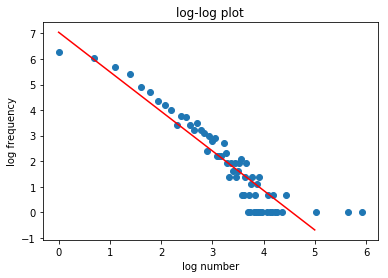

In [37]:
plt.scatter(logdays,logcounts)
plt.plot(r, y, 'r')
plt.title('log-log plot')
plt.xlabel('log number')
plt.ylabel('log frequency')
plt.show()

In [38]:
from datetime import date
import time

In [39]:
date_list = list(date_count.keys())
time_count = {}
for i in date_list:
    d = i.split('/')
    year = int(d[2])
    month = int(d[0])
    day = int(d[1])
    time_count[date(year,month,day)] = date_count[i]

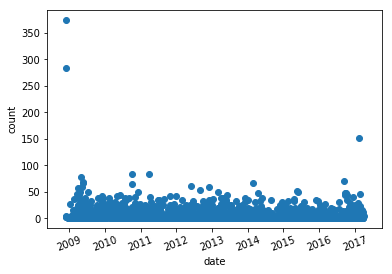

In [40]:
x = list(time_count.keys())
y = list(time_count.values())
plt.xticks(rotation=20)
plt.scatter(x,y)
plt.xlabel('date')
plt.ylabel('count')
plt.show()

In [41]:
year_count = {}
for i in date_count.keys():
    spl = i.split('/')
    year = spl[2]
    if year not in year_count.keys():
        year_count[year] = date_count[i]
    else:
        year_count[year] = year_count[year] + date_count[i]

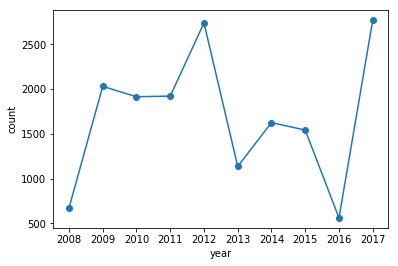

In [42]:
x = list(year_count.keys())
x.sort()
y = list(year_count.values())
plt.scatter(x,y)
plt.plot(x,y)
plt.xlabel('year')
plt.ylabel('count')
plt.show()

In [43]:
cols = artist.columns

In [44]:
cols

Index(['artist_id', 'artist_active_year_begin', 'artist_active_year_end',
       'artist_associated_labels', 'artist_bio', 'artist_comments',
       'artist_contact', 'artist_date_created', 'artist_donation_url',
       'artist_favorites', 'artist_flattr_name', 'artist_handle',
       'artist_image_file', 'artist_images', 'artist_latitude',
       'artist_location', 'artist_longitude', 'artist_members', 'artist_name',
       'artist_paypal_name', 'artist_related_projects', 'artist_url',
       'artist_website', 'artist_wikipedia_page', 'tags'],
      dtype='object')

In [45]:
active = {}
for index, row in artist.iterrows():
    if math.isnan(row['artist_active_year_begin']):
        continue
    elif math.isnan(row['artist_active_year_end']):
        continue
    elif row['artist_active_year_end'] == 0.0:
        continue
    elif row['artist_active_year_begin'] == 0.0:
        continue
    else:
        active[row['artist_id']] = (row['artist_active_year_begin'],row['artist_active_year_end'])

In [46]:
active_year = []
for i in active.keys():
    begin = active[i][0]
    end = active[i][1]
    active_year.append(end-begin)